In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
%matplotlib inline

np.random.seed(2)

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import itertools

from tensorflow.keras.utils import to_categorical # convert to one-hot-encoding
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ReduceLROnPlateau


sns.set(style='white', context='notebook', palette='deep')

In [3]:
import tensorflow as tf

# 2. Data preparation
## 2.1 Load data

In [4]:
# Load the data
train = pd.read_csv("../input/train.csv")
test = pd.read_csv("../input/test.csv")

In [5]:
Y_train = train["label"]
X_train = train.drop(labels = ["label"],axis = 1) 
# Normalize the data
X_train = X_train / 255.0
test = test / 255.0
# Reshape image in 3 dimensions (height = 28px, width = 28px , canal = 1)
X_train = X_train.values.reshape(-1,28,28,1)
test = test.values.reshape(-1,28,28,1)
# Encode labels to one hot vectors (ex : 2 -> [0,0,1,0,0,0,0,0,0,0])
Y_train = to_categorical(Y_train, num_classes = 10)

## 2.6 Split training and valdiation set 

In [6]:
# Set the random seed
random_seed = 2

In [7]:
# Split the train and the validation set for the fitting
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size = 0.1, random_state=random_seed)

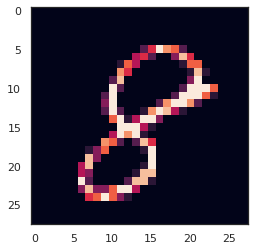

In [8]:
# Some examples
plt.imshow(X_train[0][:,:,0])

# 3. CNN
## 3.1 Define the model

In [25]:
model = Sequential()

model.add(Conv2D(filters = 32, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu', input_shape = (28,28,1)))
model.add(Conv2D(filters = 32, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
#model.add(MaxPool2D(pool_size=(2,2)))


#model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', activation ='relu'))
#model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', activation ='relu'))
#model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))


model.add(Flatten())
model.add(Dense(256, activation = "relu"))
#model.add(Dropout(0.5))
model.add(Dense(10, activation = "softmax"))
# Compile the model
model.compile(optimizer = tf.keras.optimizers.Adam(0.001), loss = "categorical_crossentropy", metrics=["accuracy"])

In [11]:
# Set a learning rate annealer
learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc', 
                                            patience=3, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=0.00001)

In [17]:
epochs = 10 # Turn epochs to 30 to get 0.9967 accuracy
batch_size = 86

In [13]:
# Without data augmentation i obtained an accuracy of 0.98114
history = model.fit(X_train, Y_train, batch_size = batch_size, epochs = epochs, 
                    validation_data = (X_val, Y_val), verbose = 2)

2021-11-28 01:08:39.181875: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/30


2021-11-28 01:08:40.389708: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


440/440 - 9s - loss: 0.1740 - accuracy: 0.9462 - val_loss: 0.0659 - val_accuracy: 0.9798
Epoch 2/30
440/440 - 2s - loss: 0.0443 - accuracy: 0.9855 - val_loss: 0.0437 - val_accuracy: 0.9874
Epoch 3/30
440/440 - 2s - loss: 0.0285 - accuracy: 0.9908 - val_loss: 0.0428 - val_accuracy: 0.9874
Epoch 4/30
440/440 - 2s - loss: 0.0216 - accuracy: 0.9927 - val_loss: 0.0526 - val_accuracy: 0.9860
Epoch 5/30
440/440 - 2s - loss: 0.0148 - accuracy: 0.9955 - val_loss: 0.0402 - val_accuracy: 0.9902
Epoch 6/30
440/440 - 2s - loss: 0.0133 - accuracy: 0.9954 - val_loss: 0.0385 - val_accuracy: 0.9905
Epoch 7/30
440/440 - 2s - loss: 0.0100 - accuracy: 0.9969 - val_loss: 0.0461 - val_accuracy: 0.9874
Epoch 8/30
440/440 - 2s - loss: 0.0117 - accuracy: 0.9956 - val_loss: 0.0575 - val_accuracy: 0.9879
Epoch 9/30
440/440 - 2s - loss: 0.0080 - accuracy: 0.9974 - val_loss: 0.0536 - val_accuracy: 0.9881
Epoch 10/30
440/440 - 2s - loss: 0.0079 - accuracy: 0.9974 - val_loss: 0.0501 - val_accuracy: 0.9879
Epoch 11/3

# 4. Evaluate the model
## 4.1 Training and validation curves

In [ ]:
# Plot the loss and accuracy curves for training and validation 
fig, ax = plt.subplots(2,1)
ax[0].plot(history.history['loss'], color='b', label="Training loss")
ax[0].plot(history.history['val_loss'], color='r', label="validation loss",axes =ax[0])
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(history.history['acc'], color='b', label="Training accuracy")
ax[1].plot(history.history['val_acc'], color='r',label="Validation accuracy")
legend = ax[1].legend(loc='best', shadow=True)

## 4.2 Confusion matrix

In [ ]:
# Look at confusion matrix 

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Predict the values from the validation dataset
Y_pred = model.predict(X_val)
# Convert predictions classes to one hot vectors 
Y_pred_classes = np.argmax(Y_pred,axis = 1) 
# Convert validation observations to one hot vectors
Y_true = np.argmax(Y_val,axis = 1) 
# compute the confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 
# plot the confusion matrix
plot_confusion_matrix(confusion_mtx, classes = range(10)) 

# MLP

In [20]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28, 1)),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.01), loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_4 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_14 (Dense)             (None, 100)               78500     
_________________________________________________________________
dense_15 (Dense)             (None, 100)               10100     
_________________________________________________________________
dense_16 (Dense)             (None, 10)                1010      
Total params: 89,610
Trainable params: 89,610
Non-trainable params: 0
_________________________________________________________________


In [21]:
history = model.fit(X_train, Y_train, batch_size = batch_size, epochs = epochs, 
                    validation_data = (X_val, Y_val), verbose = 2)

Epoch 1/10
440/440 - 1s - loss: 0.2651 - accuracy: 0.9198 - val_loss: 0.1940 - val_accuracy: 0.9436
Epoch 2/10
440/440 - 1s - loss: 0.1413 - accuracy: 0.9574 - val_loss: 0.1503 - val_accuracy: 0.9595
Epoch 3/10
440/440 - 1s - loss: 0.1140 - accuracy: 0.9660 - val_loss: 0.1322 - val_accuracy: 0.9579
Epoch 4/10
440/440 - 1s - loss: 0.1001 - accuracy: 0.9704 - val_loss: 0.1752 - val_accuracy: 0.9538
Epoch 5/10
440/440 - 1s - loss: 0.0956 - accuracy: 0.9722 - val_loss: 0.1661 - val_accuracy: 0.9617
Epoch 6/10
440/440 - 1s - loss: 0.0909 - accuracy: 0.9744 - val_loss: 0.1521 - val_accuracy: 0.9595
Epoch 7/10
440/440 - 1s - loss: 0.0935 - accuracy: 0.9738 - val_loss: 0.1624 - val_accuracy: 0.9624
Epoch 8/10
440/440 - 1s - loss: 0.0850 - accuracy: 0.9758 - val_loss: 0.1908 - val_accuracy: 0.9595
Epoch 9/10
440/440 - 1s - loss: 0.0702 - accuracy: 0.9798 - val_loss: 0.2349 - val_accuracy: 0.9557
Epoch 10/10
440/440 - 1s - loss: 0.0826 - accuracy: 0.9777 - val_loss: 0.1804 - val_accuracy: 0.9638

In [26]:
history = model.fit(X_train, Y_train, batch_size = batch_size, epochs = epochs, 
                    validation_data = (X_val, Y_val), verbose = 2)

Epoch 1/10
440/440 - 3s - loss: 0.1658 - accuracy: 0.9492 - val_loss: 0.0733 - val_accuracy: 0.9788
Epoch 2/10
440/440 - 2s - loss: 0.0449 - accuracy: 0.9863 - val_loss: 0.0466 - val_accuracy: 0.9857
Epoch 3/10
440/440 - 2s - loss: 0.0233 - accuracy: 0.9932 - val_loss: 0.0519 - val_accuracy: 0.9836
Epoch 4/10
440/440 - 2s - loss: 0.0152 - accuracy: 0.9951 - val_loss: 0.0426 - val_accuracy: 0.9890
Epoch 5/10
440/440 - 2s - loss: 0.0093 - accuracy: 0.9970 - val_loss: 0.0489 - val_accuracy: 0.9893
Epoch 6/10
440/440 - 2s - loss: 0.0085 - accuracy: 0.9972 - val_loss: 0.0570 - val_accuracy: 0.9860
Epoch 7/10
440/440 - 2s - loss: 0.0063 - accuracy: 0.9979 - val_loss: 0.0516 - val_accuracy: 0.9881
Epoch 8/10
440/440 - 2s - loss: 0.0034 - accuracy: 0.9988 - val_loss: 0.0792 - val_accuracy: 0.9836
Epoch 9/10
440/440 - 2s - loss: 0.0057 - accuracy: 0.9980 - val_loss: 0.0630 - val_accuracy: 0.9869
Epoch 10/10
440/440 - 2s - loss: 0.0062 - accuracy: 0.9979 - val_loss: 0.0834 - val_accuracy: 0.9821

In [28]:
layer1=tf.keras.Model(inputs=model.input,outputs=model.layers[0].output)
layer2=tf.keras.Model(inputs=model.input,outputs=model.layers[1].output)

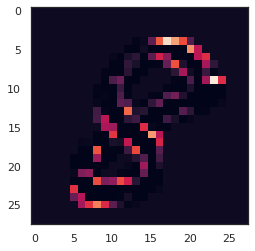

In [33]:
plt.imshow(layer1.predict(X_train[0][:,:,0].reshape(1,28,28,1))[0,:,:,0])

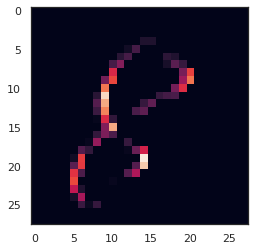

In [36]:
plt.imshow(layer1.predict(X_train[0][:,:,0].reshape(1,28,28,1))[0,:,:,3])

In [39]:
import time

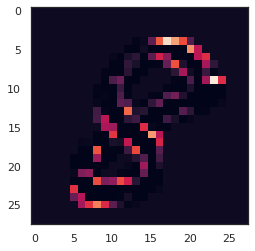

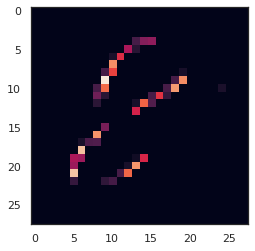

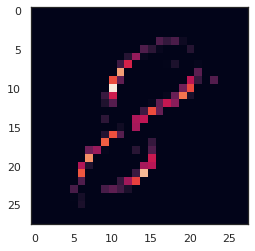

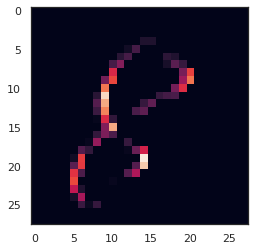

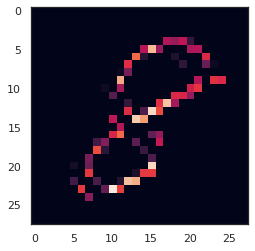

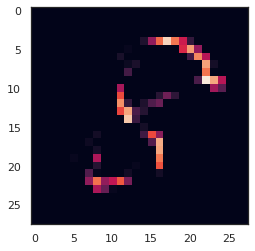

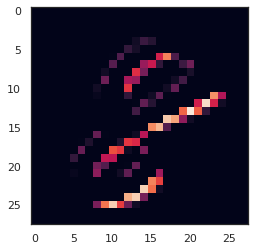

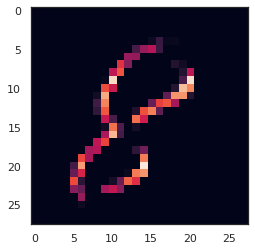

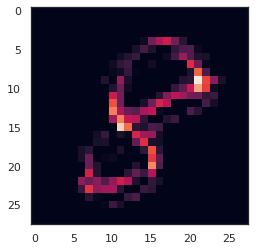

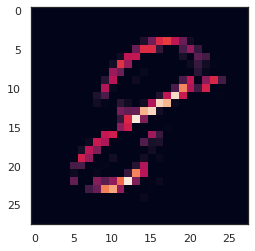

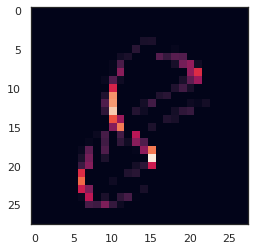

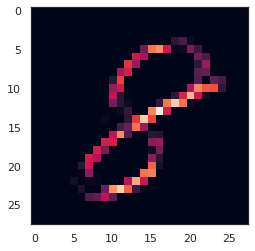

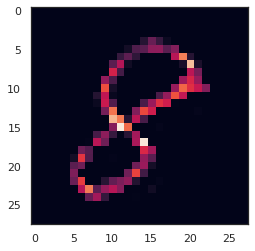

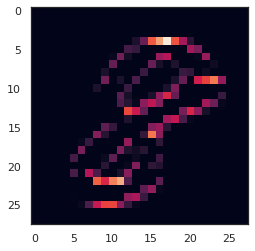

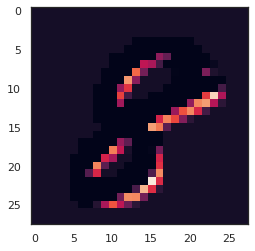

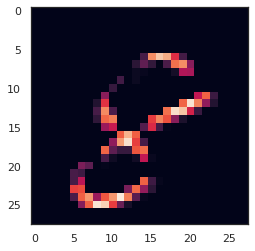

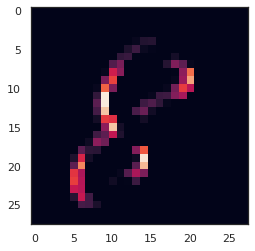

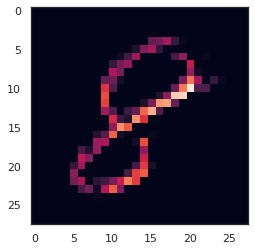

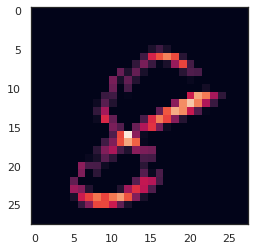

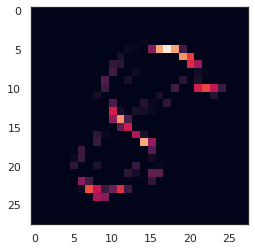

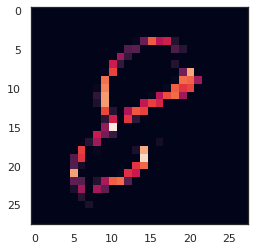

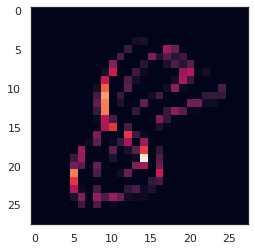

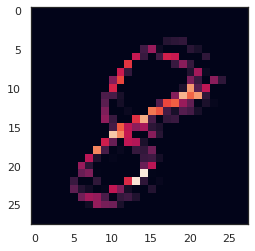

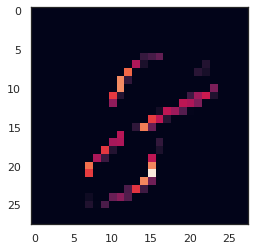

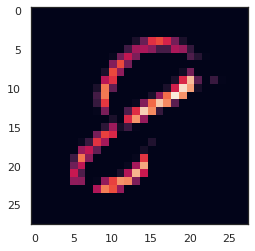

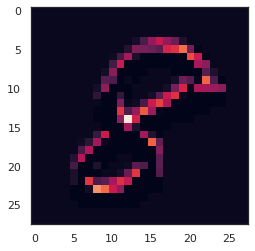

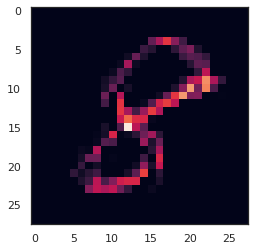

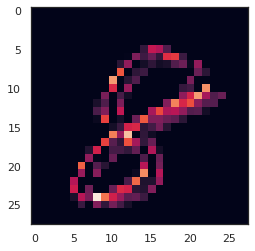

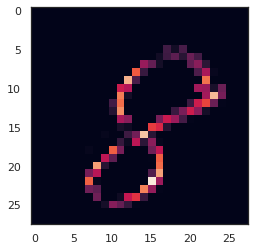

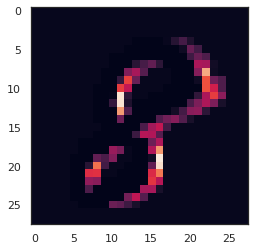

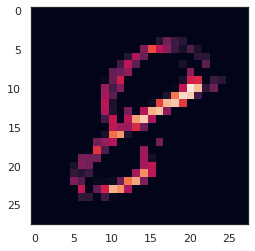

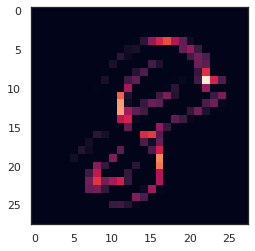

<Figure size 432x288 with 0 Axes>

In [41]:
for i in range(32):
    plt.imshow(layer1.predict(X_train[0][:,:,0].reshape(1,28,28,1))[0,:,:,i])
    plt.pause(1)
    plt.clf()

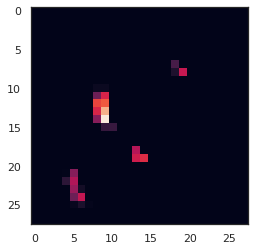

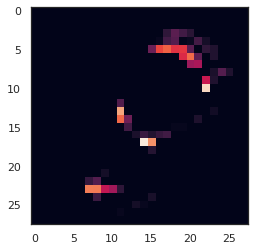

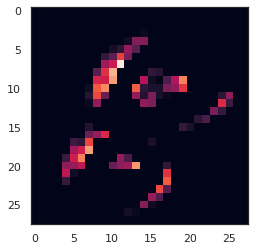

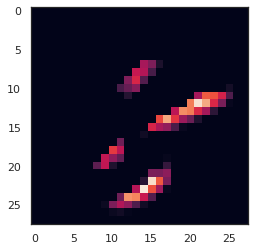

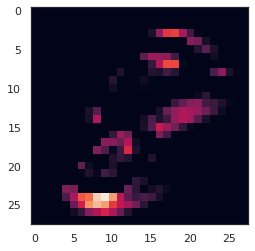

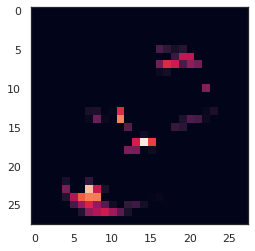

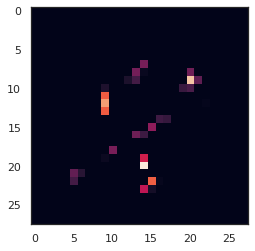

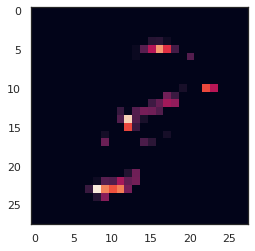

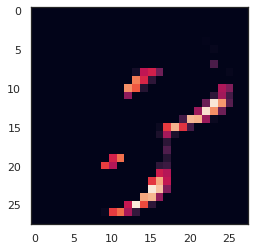

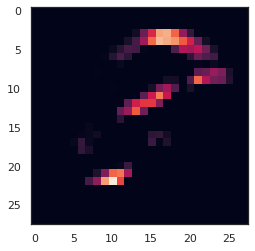

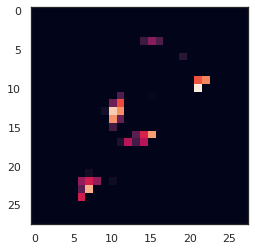

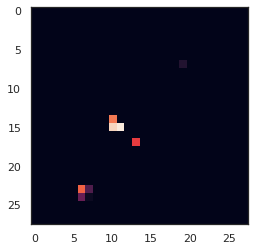

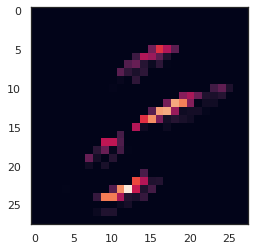

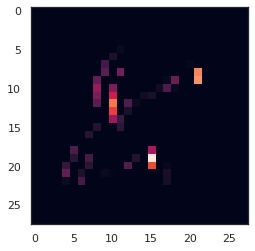

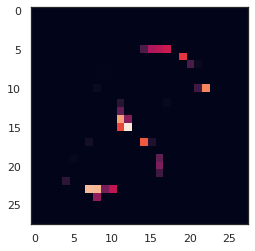

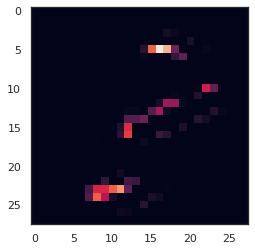

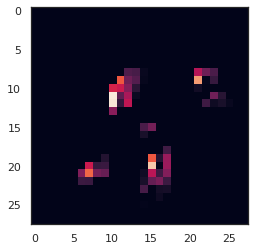

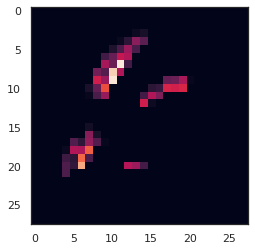

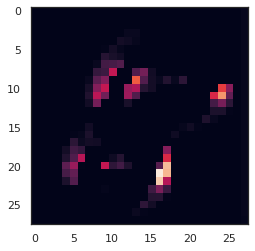

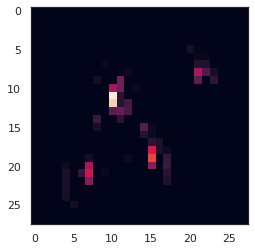

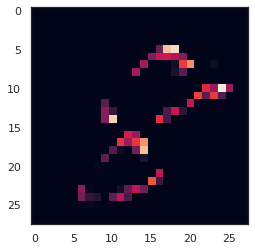

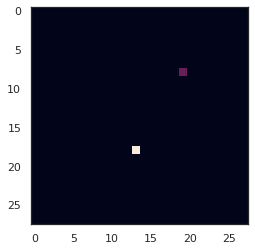

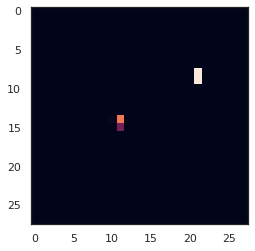

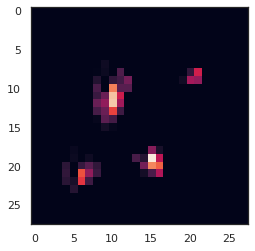

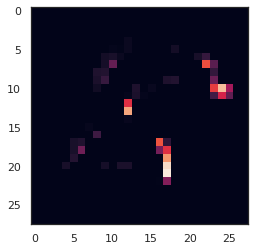

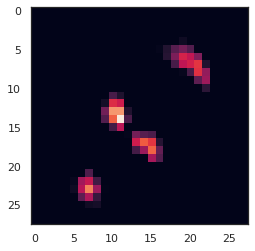

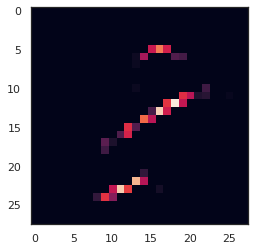

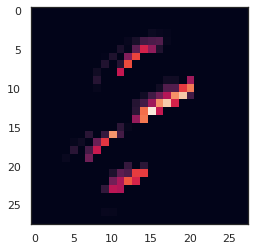

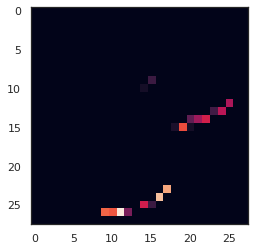

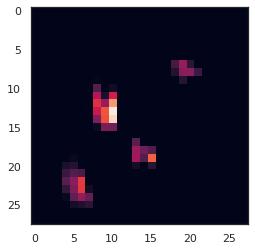

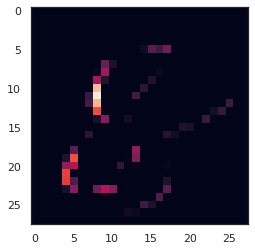

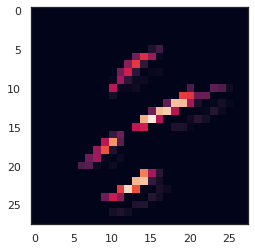

<Figure size 432x288 with 0 Axes>

In [42]:
for i in range(32):
    plt.imshow(layer2.predict(X_train[0][:,:,0].reshape(1,28,28,1))[0,:,:,i])
    plt.pause(1)
    plt.clf()